## This notebook shows the effect of quantization on selected DCT coefficients ##

In [17]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from skimage.io import imread  # if fail, do pip install scikit-image
from skimage.color import rgb2gray
from numpy import r_
import matplotlib.pylab as pylab
from scipy.fftpack import dct, idct

pylab.rcParams['figure.figsize'] = (20.0, 7.0)
# get_ipython().run_line_magic('matplotlib', 'inline')
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt5')

plt.close('all')
#%% set path
path = r'C:\1_Code\Teaching\ECE3086\class_codes\chapter_4_jpeg'
import os
os.chdir(path)

%matplotlib inline

In [18]:
#%% Mask type
# Use 64 coefficients
mask64 = np.ones((8,8))

# Use 28 coefficients
mask43 =np.array( [[1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 0],
                  [1, 1, 1, 1, 1, 1, 0, 0],
                  [1, 1, 1, 1, 1, 0, 0, 0],
                  [1, 1, 1, 1, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 0, 0, 0, 0]
                  
                 ]
               )

# Use only 10 coefficients
mask10 =np.array( [[1, 1, 1, 1, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]
                  
                 ]
               )

# Use only 3 coefficients
mask3 =np.array([[1, 1, 0, 0, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]
                  
                 ]
               )

mask = mask43
maskstr ='mask43'
mask = mask.astype('float64') 

In [19]:
#%% Select file
#filename = 'hand.jpg'
filename = 'cameraman.tif'

In [20]:
# DCT Transform using scipy library function
def resize(mat,nr,nc):
    numRow = mat.shape[0]
    numCol = mat.shape[1]
    remR = numRow % nr
    remC =  numCol % nc
    if remR==0: remR = -numRow
    if remC==0: remC = -numCol
    mat2 = mat[:-remR,:-remC]
    return mat2

# implement 2D DCT
def dct2(a, mask):
    dctMat = dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )
    dctMat2 = dctMat * mask
    return dctMat2
 

# implement 2D IDCT
def idct2(a):
    return idct( idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')   

## Study the effect of masking selected DCT coefficients

C:\Users\user\anaconda3\envs\pytorch_gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


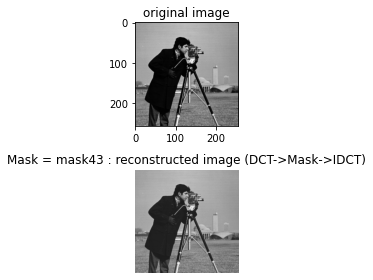

In [21]:
#%% DCT Transform Followed by Masking
im = rgb2gray(imread(filename)) 
im = resize(im,8,8) # resize to be multiple of 8 rows and col
imsize = im.shape
dctIm = np.zeros(imsize)


#Do 8x8 DCT on image 
for i in r_[:imsize[0]:8] :
    for j in r_[:imsize[1]:8] :
        dctIm[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)]  , mask)


imRecon = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        imRecon[i:(i+8),j:(j+8)] = idct2( dctIm[i:(i+8),j:(j+8)] )
        
        
plt.figure()
string = 'Mask = {} : reconstructed image (DCT->Mask->IDCT)'.format(maskstr)
plt.subplot(211), plt.imshow(im, cmap='gray'), plt.title('original image')
plt.subplot(212), plt.imshow(imRecon, cmap='gray'), plt.title(string)
plt.axis('off')
plt.tight_layout() 
plt.show()
